In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_sensors_path = '../CTC - Data Sample Sensors.csv'
data_sensors = pd.read_csv(data_sensors_path, delimiter=',')

# Convert Timestamp column to datetime
data_sensors['date'] = pd.to_datetime(data_sensors['date'], errors='coerce', utc=True)
data_sensors['temperature'] = data_sensors['temperature'].astype(float)
data_sensors['decibel_milliwatt'] = data_sensors['decibel_milliwatt'].astype(float)
data_sensors['voltage_drain'] = data_sensors['voltage_drain'].astype(float)

data_sensors

,id,uuid,date,status,temperature,decibel_milliwatt,voltage_drain,modified_at,deleted,sensor_id
0,1,83757635-61ff-4f76-8ff8-01f5b6c60f01,2023-09-28 11:50:55+00:00,True,38.0,-113.0,3.013,NaN,False,1
1,2,c13da891-0a52-4723-b831-57f52087a655,2023-09-28 11:50:55+00:00,False,38.0,-113.0,3.013,NaN,False,1
2,3,d18316a7-82d0-4cbd-ba34-655bc0fdb2cb,2023-09-28 11:50:55+00:00,False,38.0,-113.0,3.013,NaN,False,1
3,4,7aa482dd-ce2d-4ff9-bf93-f4fc770e913b,2023-09-28 11:50:55+00:00,True,38.0,-113.0,3.013,NaN,False,1
4,5,8144601e-d3c0-4990-a233-16f3464e83dd,2024-09-25 10:24:24+00:00,False,0.0,85.0,3.628,NaN,False,5
...,...,...,...,...,...,...,...,...,...,...
30917,30918,97929ef5-4478-4e2b-9cff-cad4baa7f55e,2024-11-06 19:47:45+00:00,True,7.0,-61.0,3.522,NaN,False,35
30918,30919,7ea1fa92-390d-4b8e-a3ea-83bbef9ed9a0,2024-11-06 19:47:56+00:00,False,15.0,-65.0,3.378,NaN,False,35
30919,30920,c4447c2e-78ac-4a41-ab72-aec6c5117b20,2024-11-06 19:52:25+00:00,False,-3.0,-79.0,3.613,NaN,False,1
30920,30921,01fbd535-8f04-4343-a29c-1a644061c18d,2024-11-06 20:02:37+00:00,True,-6.0,-53.0,3.605,NaN,False,16


In [18]:
data_bookings_path = '../CTC - Data Sample Bookings Groningen.csv'
data_bookings = pd.read_csv(data_bookings_path, delimiter=',')

# Convert Timestamp column to datetime
data_bookings['start time'] = pd.to_datetime(data_bookings['start time'], dayfirst=True, errors='coerce', utc=True)
data_bookings['end time'] = pd.to_datetime(data_bookings['end time'], dayfirst=True, errors='coerce', utc=True)
data_bookings['Reservation Duration'] = pd.to_timedelta(data_bookings['Reservation Duration']).dt.total_seconds().astype(int) // 60


data_bookings

,reservation id,email,license plate,start time,end time,Smart Zone,City,Reservation Duration,Anonymous
0,NLGR10004L,producer@luthersbachensemble.nl,VD956V,2023-11-20 12:15:00+00:00,2023-11-20 12:45:00+00:00,Haddingestraat,Groningen,30,No
1,NLGR100108,producer@luthersbachensemble.nl,VD956V,2023-11-20 12:45:00+00:00,2023-11-20 13:15:00+00:00,Haddingestraat,Groningen,30,No
2,NLGR1002EF,producer@luthersbachensemble.nl,VD956V,2023-11-20 13:15:00+00:00,2023-11-20 13:45:00+00:00,Haddingestraat,Groningen,30,No
3,NLGR100390,producer@luthersbachensemble.nl,VD956V,2023-11-20 13:45:00+00:00,2023-11-20 14:15:00+00:00,Haddingestraat,Groningen,30,No
4,NLGR1004BC,producer@luthersbachensemble.nl,VD956V,2023-11-20 14:15:00+00:00,2023-11-20 14:45:00+00:00,Haddingestraat,Groningen,30,No
...,...,...,...,...,...,...,...,...,...
2330,NLGR995J5,producer@luthersbachensemble.nl,VD956V,2023-11-17 11:15:00+00:00,2023-11-17 11:45:00+00:00,Haddingestraat,Groningen,30,No
2331,NLGR9963D,producer@luthersbachensemble.nl,VD956V,2023-11-17 09:15:00+00:00,2023-11-17 09:30:00+00:00,Haddingestraat,Groningen,15,No
2332,NLGR997HI,vanderkamp@coupry.nl,98hjs9,2023-11-18 10:45:00+00:00,2023-11-18 11:00:00+00:00,Haddingestraat,Groningen,15,Yes
2333,NLGR998ED,tymenjanbronda@planet.nl,SR853V,2023-11-19 10:00:00+00:00,2023-11-19 10:30:00+00:00,Haddingestraat,Groningen,30,No


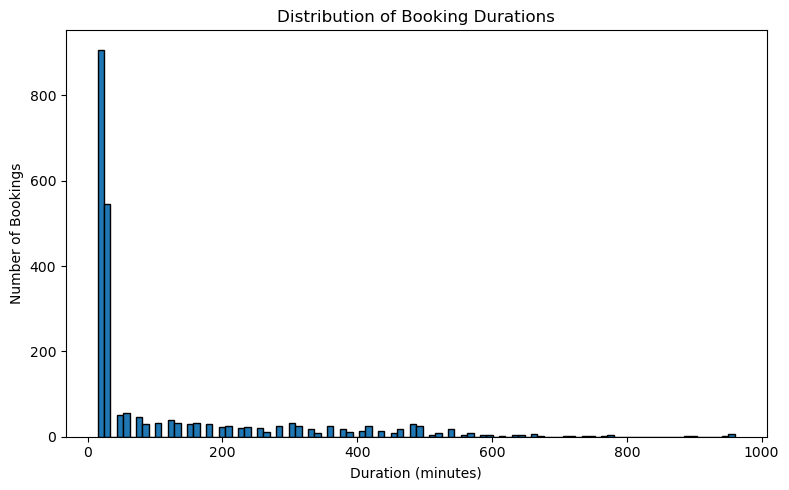

In [20]:
# Histogram of booking durations
plt.figure(figsize=(8,5))
plt.hist(data_bookings['Reservation Duration'], bins=100, edgecolor='black')

plt.title("Distribution of Booking Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Bookings")

plt.tight_layout()
plt.show()